In [1]:
import pandas as pd
from pathlib import Path

In [18]:
# Import data
interest_rate = pd.read_csv('Resources/MORTGAGE30US.csv', parse_dates=['DATE'], index_col='DATE')
rent_data = pd.read_csv('Resources/Metro_zori_uc_sfrcondomfr_sm_month.csv', index_col='RegionID')
total_trans_value = pd.read_csv('Resources/Metro_total_transaction_value_uc_sfr_month.csv', index_col='RegionID')
sales_count = pd.read_csv('Resources/Metro_sales_count_now_uc_sfrcondo_month.csv', index_col='RegionID')
median_sale = pd.read_csv('Resources/Metro_median_sale_price_uc_sfr_month.csv', index_col='RegionID')
market_temp_index = pd.read_csv('Resources/Metro_market_temp_index_uc_sfrcondo_month.csv', index_col='RegionID')


<Axes: xlabel='DATE'>

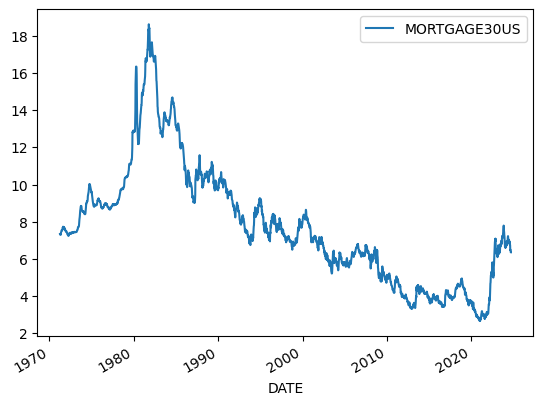

In [30]:
interest_rate.plot()